In [12]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Boxplots

In [15]:
CompStrength = pd.read_csv('CompStrength.csv')

<Axes: >

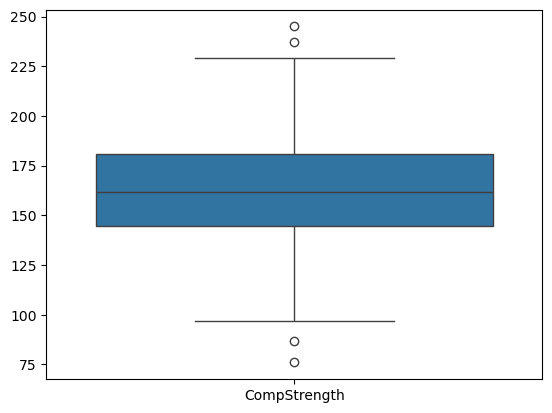

In [17]:
sns.boxplot(CompStrength, whis=1.5)

In [19]:
np.percentile(CompStrength,[25,50,75],method='linear')

array([144.5, 161.5, 181. ])

In [21]:
#np.quantile(CompStrength,[.25,.50,.75])

In [23]:
.25*(79)+1

20.75

In [25]:
143+ .75*(145-143)

144.5

In [27]:
CompStrength.describe()

,CompStrength
count,80.000000
mean,162.662500
std,33.773236
min,76.000000
25%,144.500000
50%,161.500000
75%,181.000000
max,245.000000


In [29]:
CompStrength=CompStrength.sort_values(by="CompStrength").reset_index()
CompStrength.index = CompStrength.index + 1

In [31]:
CompStrength

,index,CompStrength
1,42,76
2,67,87
3,8,97
4,50,101
5,0,105
...,...,...
76,1,221
77,17,228
78,46,229
79,69,237


Text(0.5, 0, 'CompStrength')

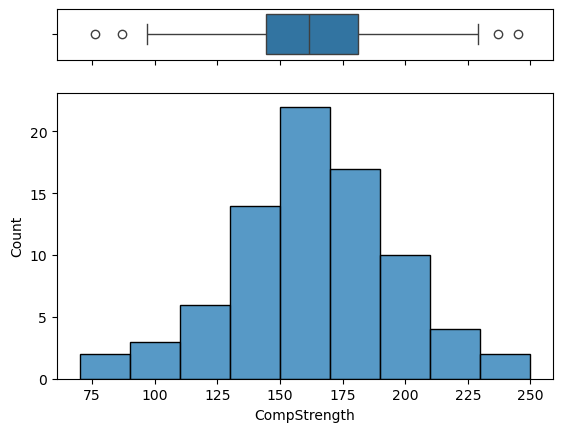

In [33]:
fig,(ax1,ax2)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(0.15,0.85)})
sns.boxplot(x=CompStrength["CompStrength"], ax=ax1)
sns.histplot(data=CompStrength["CompStrength"],binwidth=20,binrange=(70,250),ax=ax2)
plt.xlabel("CompStrength")

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='CompStrength', ylabel='Probability'>

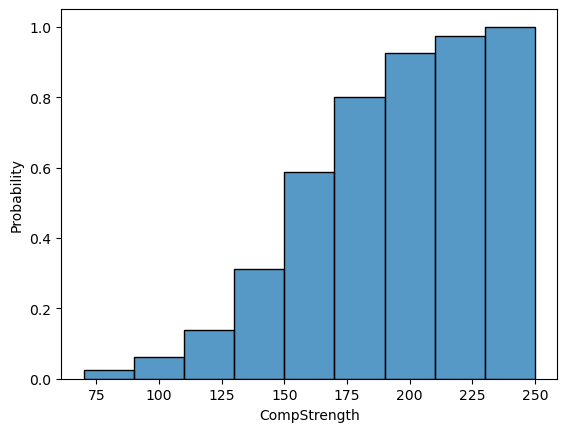

In [37]:
sns.histplot(data=CompStrength["CompStrength"],binwidth=20,binrange=(70,250),stat='probability',bins=9,cumulative=True)

In [39]:
np.percentile(CompStrength["CompStrength"],[25,50,75],method='linear')

array([144.5, 161.5, 181. ])

In [41]:
# Dataframe pandas
CompStrength["CompStrength"].quantile([.1, .5,.25,.5,.75])

0.10    119.8
0.50    161.5
0.25    144.5
0.50    161.5
0.75    181.0
Name: CompStrength, dtype: float64

In [43]:
def sample_skew(data):
    n = len(CompStrength)
    mean = np.mean(CompStrength["CompStrength"])
    s = np.std(CompStrength["CompStrength"], ddof=1)  # Sample standard deviation

    # Compute the third moment
    third_moment = np.sum(( (CompStrength["CompStrength"] - mean) / s) ** 3)

    # Compute sample kurtosis
    skew =( ( (n) / ((n - 1) * (n - 2))) ) * (third_moment)  

    return skew

In [45]:
sample_skew(CompStrength["CompStrength"])

-0.02502533163039341

In [47]:
from scipy import stats

In [49]:
# bias=False provides calculations corrected for statistical bias
stats.skew(CompStrength["CompStrength"],bias=False)

-0.02502533163039352

In [51]:
# Kurtosis
# bias=False provides calculations corrected for statistical bias
# fishers=True provides excess Kurtosis
stats.kurtosis(CompStrength["CompStrength"],bias=False,fisher=True)

0.24027117148564692

In [53]:
def sample_kurtosis(data):
    n = len(CompStrength)
    mean = np.mean(CompStrength["CompStrength"])
    s = np.std(CompStrength["CompStrength"], ddof=1)  # Sample standard deviation

    # Compute the fourth moment
    fourth_moment = np.sum(( (CompStrength["CompStrength"] - mean) / s) ** 4)

    # Compute sample kurtosis
    kurtosis =( ( (n * (n+1)) / ((n - 1) * (n - 2) * (n - 3)) ) * (fourth_moment) ) - ( 3 * np.square(n - 1) /( (n-2)*(n-3) ) )

    return kurtosis

In [55]:
sample_kurtosis(CompStrength["CompStrength"])

0.2402711714856438

# Normal Probability Plot

In [58]:
import statsmodels.graphics.gofplots as sm

In [82]:
j=np.arange(1,81)

In [84]:
perc=j/(len(CompStrength)+1)
perc

array([0.01234568, 0.02469136, 0.03703704, 0.04938272, 0.0617284 ,
       0.07407407, 0.08641975, 0.09876543, 0.11111111, 0.12345679,
       0.13580247, 0.14814815, 0.16049383, 0.17283951, 0.18518519,
       0.19753086, 0.20987654, 0.22222222, 0.2345679 , 0.24691358,
       0.25925926, 0.27160494, 0.28395062, 0.2962963 , 0.30864198,
       0.32098765, 0.33333333, 0.34567901, 0.35802469, 0.37037037,
       0.38271605, 0.39506173, 0.40740741, 0.41975309, 0.43209877,
       0.44444444, 0.45679012, 0.4691358 , 0.48148148, 0.49382716,
       0.50617284, 0.51851852, 0.5308642 , 0.54320988, 0.55555556,
       0.56790123, 0.58024691, 0.59259259, 0.60493827, 0.61728395,
       0.62962963, 0.64197531, 0.65432099, 0.66666667, 0.67901235,
       0.69135802, 0.7037037 , 0.71604938, 0.72839506, 0.74074074,
       0.75308642, 0.7654321 , 0.77777778, 0.79012346, 0.80246914,
       0.81481481, 0.82716049, 0.83950617, 0.85185185, 0.86419753,
       0.87654321, 0.88888889, 0.90123457, 0.91358025, 0.92592

In [104]:
A = sm.ProbPlot(CompStrength["CompStrength"],fit=True)
A.theoretical_percentiles

array([0.01234568, 0.02469136, 0.03703704, 0.04938272, 0.0617284 ,
       0.07407407, 0.08641975, 0.09876543, 0.11111111, 0.12345679,
       0.13580247, 0.14814815, 0.16049383, 0.17283951, 0.18518519,
       0.19753086, 0.20987654, 0.22222222, 0.2345679 , 0.24691358,
       0.25925926, 0.27160494, 0.28395062, 0.2962963 , 0.30864198,
       0.32098765, 0.33333333, 0.34567901, 0.35802469, 0.37037037,
       0.38271605, 0.39506173, 0.40740741, 0.41975309, 0.43209877,
       0.44444444, 0.45679012, 0.4691358 , 0.48148148, 0.49382716,
       0.50617284, 0.51851852, 0.5308642 , 0.54320988, 0.55555556,
       0.56790123, 0.58024691, 0.59259259, 0.60493827, 0.61728395,
       0.62962963, 0.64197531, 0.65432099, 0.66666667, 0.67901235,
       0.69135802, 0.7037037 , 0.71604938, 0.72839506, 0.74074074,
       0.75308642, 0.7654321 , 0.77777778, 0.79012346, 0.80246914,
       0.81481481, 0.82716049, 0.83950617, 0.85185185, 0.86419753,
       0.87654321, 0.88888889, 0.90123457, 0.91358025, 0.92592

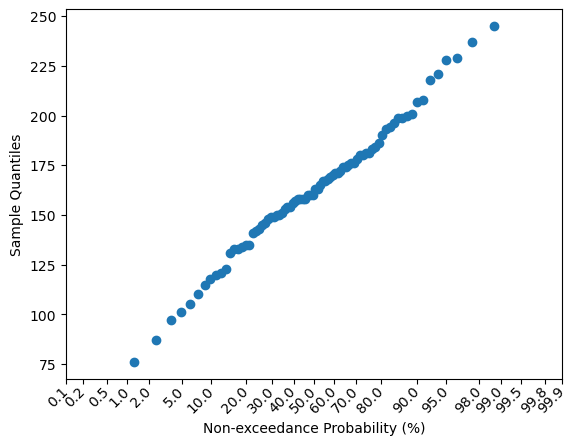

In [106]:
A.probplot()
plt.show()

In [108]:
A.theoretical_percentiles*(81)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80.])